# Chapter 3 - Foundations of descriptive analytics
The third lecture has offered an overview of the field of descriptive analytics. Out of the space of methods for descriptive analytics, the lecture concentrated on techniques for cluster analysis. Given this focus in the lecture, the tutorial will revisit the **kMeans** algorithm and deepen our understanding how this algorithm segments a given data set. This will also help us to introduce some more Python functionality and further develop our understanding of Python programming and relevant libraries. 

Here is the outline of the tutorial:
*   Generating data for cluster analysis 
*   kMeans Algorithm from Scratch
*   kMeans Algorithm from SK Learn
*   Finding Optimal K

## Review of Cluster Analysis

Cluster analysis is a good example of unsupervised machine learning or machine learning with unlabelled data (no specified target variable). Algorithms in this type of analysis attempt to group observations based on their similarities in features. In the end, we can try to describe clusters and how they differ from one another.

An example of this application could be analysing data from a survey. We may have several distinct groups of potential buyers who reveal distinct preferences through their choices. Cluster analysis can be applied based on their choices to group similar responses and we can then charaterise groups to determine marketing efforts.

## kMeans

kMeans belongs to the family of non-hierarchical cluster analysis methods. Random centroids are spread through the data, then the nearest points to that centroid are assigned to it. The centroids are recalculated based on the new assignment and the observations are reassigned to the nearest point. This process repeats itself until it is stable. Results may differ based on the initial random selection of centroids, so it is important to run this process multiple times and calculate the iteration which results in the smallest distance.

The difference between hierarchical and non-hierarchical clustering algorithms is the way clusters are calculated. While hierarchical clustering often creates sequential splits which maximize homogeneity within final clusters, non-hierarchical clustering with kMeans places random centroids around the feature space and assigns observations to those centroids. In this way, we cannot draw any sort of sequential splits in kMeans.

# Data Generation for Cluster Analysis

In order to verify that this method of analysis works, we can generate data using sklearn. The function `make_classification()` alows us to create a dataset with all kinds of characteristics. We can create clusters of observations using this function which we can then use to test algorithm on. 

The documentation for this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

np.random.seed(10)

In [2]:
X,y = make_classification(n_samples=4000, n_classes=2, n_informative=6, n_features=10, class_sep=1, random_state=10) # by default includes: n_features=20, n_informative=2, n_redundant=2, n_classes=2, n_clusters_per_class=2...

In [3]:
X[:5] # since it is a NumPy array, use slicing to inspect instead of .head() as we would for a pandas DataFrame

array([[-4.30778937, -1.28869187, -0.35637871,  0.48165849, -3.19737508,
        -0.04615532,  1.6824544 , -1.15632338, -1.43637121, -0.94263771],
       [-0.54520231,  2.25726399, -0.34972219,  0.32523467,  2.36463896,
         0.29267071, -1.21030002, -0.88382567,  0.17194531, -1.27435624],
       [-0.40072828,  0.27721173, -0.95901262,  2.94866352,  0.98100489,
        -0.90198437, -1.49048888, -0.48884261, -0.21942839, -0.56479294],
       [-3.22770543,  0.51913726, -1.5962249 ,  0.69406228, -1.15333002,
         0.48902447, -0.72067066, -1.04316157,  0.55876656, -2.59544712],
       [-0.93038371, -0.19298958,  1.08334749,  1.55908282, -1.66985171,
        -0.13627538,  2.75135259,  1.3690085 , -1.01539634, -0.72006729]])

In [4]:
y[:5] # true labels for the dataset

array([0, 1, 1, 1, 0])

In [5]:
np.mean(X[y == 1], axis=0) # there are two groups based on y values, here are the mean values for each feature for y=1

array([-2.7637565 ,  1.01778884, -0.96834637,  0.0042941 ,  0.07002857,
        0.01149626, -0.10031453, -0.99873303, -1.00062247, -0.96549505])

In [6]:
np.mean(X[y == 0], axis=0) # here are the mean values for each feature for y=0

array([-0.96067228, -1.00887301,  0.02061757,  0.00838744, -0.98777441,
        0.00551366,  0.54939346, -0.01933266, -1.02545028, -0.01695516])

In [7]:
X.shape # ensure shape is as expected

(4000, 10)

# The kMeans algorithm from Scratch
The kMeans algorithm is an established and widely used method for clustering. Much more sophisticated algorithms exist, many of which are readily available in Python libraries. However, it is good practice to start simple. For the purpose of BADS, knowing kMeans and what clustering in general can do for us is enough. 

In [8]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2)) # other distance measures also possible

In [9]:
def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

In [10]:
def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

In [11]:
def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [euclidean_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

In [12]:
def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

In [13]:
def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) == 0 # return Boolean indicating whether centroids are the same as before or not

In [14]:
def KMeans_from_scratch(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged(centroids_old, centroids, K): # check if last iteration's centroids were the same as current iteration
            labels = label_cluster(n_samples, clusters)
            dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
            total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
            break # exit loop since there was no change since last iteration

    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist

In [15]:
result = KMeans_from_scratch(X, K=2, max_iters=100)

In [16]:
print("No. Iterations:", result[1], ", No. Centres:", result[2], ", Total Squared Distance", result[4])

No. Iterations: 19 , No. Centres: 2 , Total Squared Distance 84239.16946363819


In [17]:
print("Centroid Coordinates:", result[3]) # these display average value for each feature of the cluster

Centroid Coordinates: [[-3.86460395  0.53445597 -0.63295369 -0.01355069 -1.06072312  0.04271011
   0.99795513 -1.24389675 -1.63779097 -0.72212214]
 [ 0.16792771 -0.52898098 -0.31470149  0.02654275  0.15535038 -0.02623681
  -0.56298802  0.23521545 -0.37814253 -0.2589944 ]]


### kMeans and "True" Groups

Let's see whether the kMeans function was able to distinguish the groups of y=1 and y=0. kMeans and other clustering algorithms are most often used as unsupervised algorithms. The goal of the algorithm is not necessarily to distinguish between these two groups, but to find some meaningful split in the feature space. This means that the function's clusters may not conform to our previous expectation of how splits should occur as it may focus on features which are actually irrelevant or classes may not be distinct enough. Let's see if our results split on the y=1,0 groups or if the algorithm seems to have split the observations in a different way.

In [18]:
result[0][:5] # classifications according to kMeans from scratch

array([0., 1., 1., 0., 1.])

In [19]:
y[:5] # true groups

array([0, 1, 1, 1, 0])

In [20]:
from collections import Counter

Counter(result[0][y == 1]) # note that there is still a large mix in this group, some features were uninformative, this could be misleading the kMeans function

Counter({0.0: 1253, 1.0: 752})

In [21]:
Counter(result[0][y == 0])

Counter({0.0: 763, 1.0: 1232})

Let's try to create another dataset which is easier for the kMeans algorithm to determine. We will only include relevant variables and increase class separation. Let's see if we can get the function to do better at getting pure separations based on y values.

In [22]:
X_simple,y_simple = make_classification(n_samples=4000, n_classes=2, n_informative=6, n_features=6, n_redundant=0, class_sep=2, random_state=10) # drop redundant and uninformative features, add more class separation

In [23]:
result_simple = KMeans_from_scratch(X_simple, K=2, max_iters=100)

In [24]:
from collections import Counter

Counter(result_simple[0][y_simple == 1]) # much more purity due to simplified dataset

Counter({0.0: 4, 1.0: 1989})

In [25]:
Counter(result_simple[0][y_simple == 0])

Counter({0.0: 987, 1.0: 1020})

## Optimal K from Scratch

Let's check whether or not this was the optimal number for K. To do this, we can run the algorithm multiple times for different numbers for K. We could then plot the number of K on the x-axis and the total distance on the y-axis of a graph. Wherever we see a bend in the curve (or the elbow) is where we should consider the optimal number. Anything past the bend of the curve would make the model unnecessarily complex. We would be adding more centroids but not really explaining much complexity.

In [26]:
list_total_dist = []

for i in range(1,9):
  results = KMeans_from_scratch(X, K=i, max_iters=100)
  list_total_dist.append(results[4])

list_total_dist

[109641.75160463342,
 84239.16946363819,
 71310.44201020605,
 63923.50269951007,
 59133.15646042065,
 55061.85267705688,
 52362.74938545619,
 48624.800426405214]

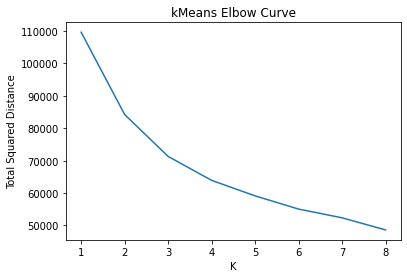

In [27]:
plt.plot(range(1,9), list_total_dist)
plt.title("kMeans Elbow Curve")
plt.ylabel("Total Squared Distance")
plt.xlabel("K")
plt.show()

# kMeans with sklearn

As with the most popular machine learning algorithm, the library sklearn has an easy way to implement the kMeans algorithm. We simply have to import the KMeans function from the sklearn.cluster library.

The documentation for this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Once you create a KMeans object, you can use many methods and attributes to fit, predict and evaluate your model.

In [28]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=20, max_iter=100, random_state=123) # create KMeans object with certain settings

res = km.fit_predict(X) # fit to X and also predict labels of X, not using the easier X_simple

In [29]:
km.cluster_centers_ # here are the centroids for kMeans, these display average value for each feature of the cluster

array([[-3.88957088,  0.54297154, -0.62676362, -0.01415858, -1.06939376,
         0.04172012,  1.01766678, -1.25713602, -1.64826198, -0.71337592],
       [ 0.13647809, -0.52259565, -0.32524668,  0.02658543,  0.1469941 ,
        -0.02429913, -0.56074168,  0.22771273, -0.38532632, -0.2740814 ]])

In [30]:
km.n_iter_ # this is the number of iterations required for stability in this solution

14

In [31]:
km.inertia_ # here is a value similar to total distance for the clusters

84237.49670907139

In [32]:
km.labels_[:10] # here are the labels for each observation from the clustering

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

In [33]:
Counter(km.labels_[y == 1]) # we have a similar level of purity as we had before with the original dataset

Counter({0: 1236, 1: 769})

In [34]:
Counter(km.labels_[y == 0])

Counter({0: 752, 1: 1243})

### Optimal K in sklearn

We can perform the same elbow curve method on sklearn results. The `.inertia_` attribute on a fit kMeans object allows us to see the sum of squared distance between points and their centroid.

In [35]:
list_total_dist_sklearn = []

for i in range(1,9):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=123) # go from 1 to 8 in the value of centroids
  res = km.fit_predict(X)
  list_total_dist_sklearn.append(km.inertia_) # check how inertia (~total distance) changes as we increase K

list_total_dist_sklearn

[109641.75160463343,
 84237.51497285561,
 71310.2616307047,
 63923.9401588115,
 58783.86403796937,
 54969.955097086335,
 51247.95553846268,
 48618.29596686946]

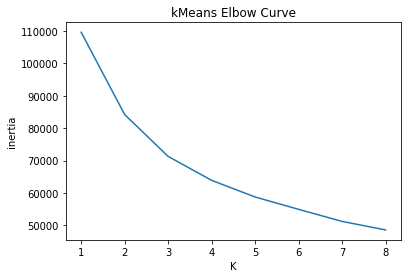

In [36]:
plt.plot(range(1,9), list_total_dist_sklearn) # from this graph, we can see the sharpest bend at 2 again
plt.title("kMeans Elbow Curve")
plt.ylabel("inertia")
plt.xlabel("K")
plt.show()

Here again, we can see the sharpest kink at K=2. 



# Conclusion

kMeans is just one of a few powerful clustering functions whose applications can simplify groups found in data for analysis. While these algorithms can be very powerful, a good understanding of their strengths and weaknesses are critical for an accurate and meaningful analysis of the situation.